In [ ]:
"""
Link to original notebook:
https://github.com/cschlosberg/codergirl-python/
blob/master/Fashion-CNN-Clean.ipynb

(DataCamp tutorial:
https://www.datacamp.com/community/tutorials/convolutional-neural-networks-python)

Convolutional Neural Networks in Python with Keras
"""

In [2]:
from keras.datasets import fashion_mnist

(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

In [3]:
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

print("Training data shape: ", train_X.shape, train_Y.shape)
print("Testing data shape: ", test_X.shape, test_Y.shape)

Training data shape:  (60000, 28, 28) (60000,)
Testing data shape:  (10000, 28, 28) (10000,)


In [4]:
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs: ', nClasses)
print('Output classes: ', classes)

Total number of outputs:  10
Output classes:  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth: 9')

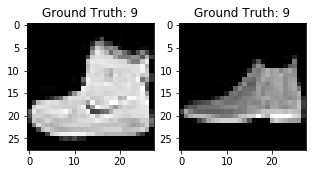

In [5]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth: {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth: {}".format(test_Y[0]))

In [6]:
# Preprocess the data
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [7]:
# Change the data type fron int8
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255
test_X = test_X / 255

In [8]:
# One-hot encoding: convert categorical data into a vector of numbers
train_Y_oneHot = to_categorical(train_Y)
test_Y_oneHot = to_categorical(test_Y)

print('Original label: ', train_Y[0])
print('After conversion to one-hot: ', train_Y_oneHot[0])

Original label:  9
After conversion to one-hot:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [9]:
# partition the training and testing data
from sklearn.model_selection import train_test_split
train_X, valid_X, train_label, valid_label = train_test_split(train_X, train_Y_oneHot,
                                                        test_size=0.2, random_state=13)

In [10]:
train_X.shape, valid_X.shape, train_label.shape, valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

In [12]:
# model the data
import keras
from keras.models import Sequential, Input, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [13]:
# train the network for 20 epochs
batch_size = 64
epochs = 20
num_classes = 10

In [14]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(Dense(num_classes, activation='softmax'))

In [15]:
# use the Adam optimizer and compile the model
fashion_model.compile(loss=keras.losses.categorical_crossentropy,
                     optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [16]:
fashion_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)        